In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv('customer_churn_data.csv')

# Display first 5 rows
print(df.head())

# Check dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

   Customer_ID Last_Order_Date  Order_Frequency   Spend Discount_Used  \
0            1      2023-01-01                6  102.80           Yes   
1            2      2023-01-02                3  422.74           Yes   
2            3      2023-01-03                4  404.50            No   
3            4      2023-01-04                3  294.69           Yes   
4            5      2023-01-05                4  257.29            No   

  App_Usage Delivery_Issues Churn  
0      High              No    No  
1    Medium              No   Yes  
2    Medium             Yes   Yes  
3    Medium              No    No  
4      High              No    No  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer_ID      1000 non-null   int64  
 1   Last_Order_Date  1000 non-null   object 
 2   Order_Frequency  1000 non-null   int64  
 3   Spend

In [12]:
# Summary statistics
print(df.describe())

       Customer_ID  Order_Frequency        Spend
count  1000.000000      1000.000000  1000.000000
mean    500.500000         7.511000   277.155740
std     288.819436         4.057628   131.103641
min       1.000000         1.000000    50.030000
25%     250.750000         4.000000   162.787500
50%     500.500000         8.000000   280.820000
75%     750.250000        11.000000   392.440000
max    1000.000000        14.000000   499.760000


   Customer_ID Last_Order_Date  Order_Frequency   Spend Discount_Used  \
0            1      2023-01-01                6  102.80           Yes   
1            2      2023-01-02                3  422.74           Yes   
2            3      2023-01-03                4  404.50            No   
3            4      2023-01-04                3  294.69           Yes   
4            5      2023-01-05                4  257.29            No   

  App_Usage Delivery_Issues Churn  
0      High              No    No  
1    Medium              No   Yes  
2    Medium             Yes   Yes  
3    Medium              No    No  
4      High              No    No  


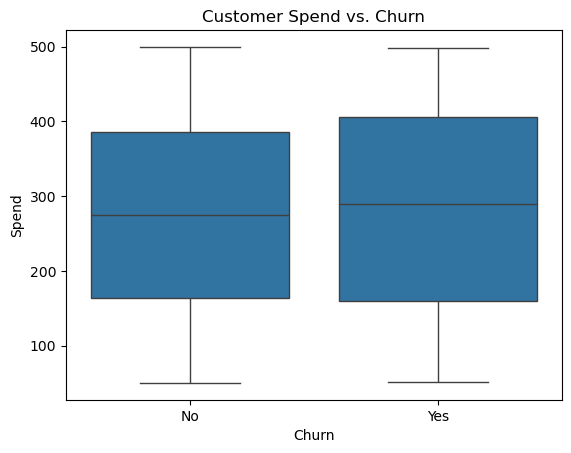

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("customer_churn_data.csv")  # Ensure this file exists

# Check if df is loaded
print(df.head())  

# Create boxplot
sns.boxplot(x="Churn", y="Spend", data=df)
plt.title("Customer Spend vs. Churn")
plt.show()


   Customer_ID Last_Order_Date  Order_Frequency   Spend Discount_Used  \
0            1      2023-01-01                6  102.80           Yes   
1            2      2023-01-02                3  422.74           Yes   
2            3      2023-01-03                4  404.50            No   
3            4      2023-01-04                3  294.69           Yes   
4            5      2023-01-05                4  257.29            No   

  App_Usage Delivery_Issues Churn  
0      High              No    No  
1    Medium              No   Yes  
2    Medium             Yes   Yes  
3    Medium              No    No  
4      High              No    No  
Customer_ID          int64
Last_Order_Date     object
Order_Frequency      int64
Spend              float64
Discount_Used       object
App_Usage           object
Delivery_Issues     object
Churn               object
dtype: object


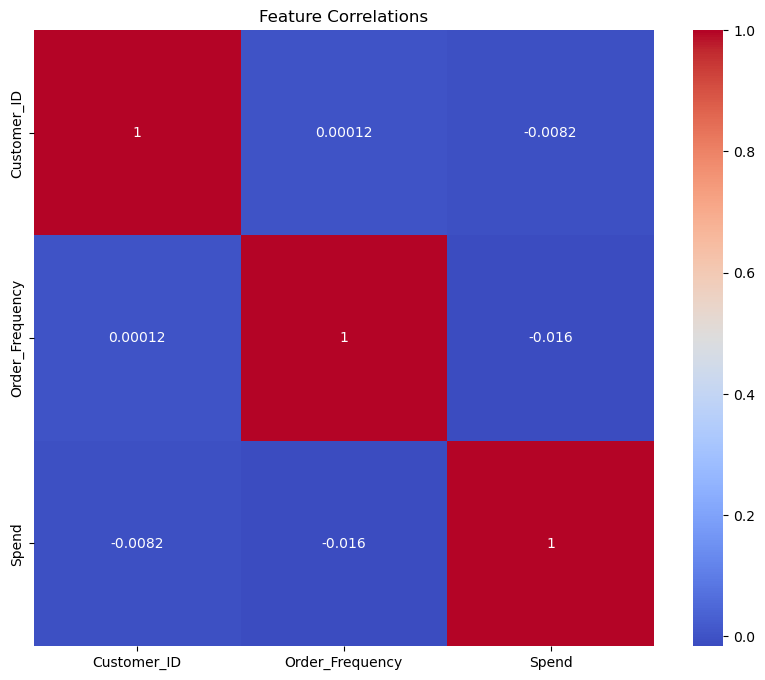

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data
# df = pd.read_csv('your_data.csv')  # Replace with your actual file path

# Inspect the data
print(df.head())
print(df.dtypes)

# Drop non-numeric columns or encode categorical variables
df_numeric = df.select_dtypes(include=['number'])  # Option 1: Keep only numeric columns
# df_encoded = pd.get_dummies(df, drop_first=True)  # Option 2: Encode categorical variables

# Handle missing values
df_numeric.fillna(df_numeric.mean(), inplace=True)

# Compute and visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlations')
plt.show()

In [14]:
import sqlite3

# Create database and store data
conn = sqlite3.connect("customer_churn.db")
df.to_sql("customer_data", conn, if_exists="replace", index=False)


1000

In [15]:
query = "SELECT COUNT(*) FROM customer_data WHERE Churn = 'Yes'"
churned_customers = pd.read_sql(query, conn)
print("Total Churned Customers:\n", churned_customers)


Total Churned Customers:
    COUNT(*)
0       304


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert 'Yes'/'No' to 1/0
label_enc = LabelEncoder()
df["Churn"] = label_enc.fit_transform(df["Churn"])

# Select features & target variable
X = df.drop(columns=["Customer_ID", "Churn"])  # Features
y = df["Churn"]  # Target (1 = Churn, 0 = No Churn)

# Split data (80% Training, 20% Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Load your dataset
df = pd.read_csv("customer_churn_data.csv")

# Convert Last_Order_Date to datetime format
df['Last_Order_Date'] = pd.to_datetime(df['Last_Order_Date'])

# Convert Last_Order_Date to "days since the first recorded date"
df['Days_Since_Last_Order'] = (df['Last_Order_Date'] - df['Last_Order_Date'].min()).dt.days

# Drop original date column
df.drop(columns=['Last_Order_Date'], inplace=True)

# Convert categorical columns to numerical values using Label Encoding
label_cols = ['Discount_Used', 'App_Usage', 'Delivery_Issues', 'Churn']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numbers
    label_encoders[col] = le  # Save encoder for future reference

# Define features (X) and target variable (y)
X = df.drop(columns=['Churn'])  # All columns except 'Churn'
y = df['Churn']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Check accuracy
from sklearn.metrics import accuracy_score
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 0.665


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", report)


Model Accuracy: 66.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       140
           1       0.32      0.10      0.15        60

    accuracy                           0.67       200
   macro avg       0.51      0.50      0.47       200
weighted avg       0.59      0.67      0.60       200



C:\Users\vsara\AppData\Local\Temp\ipykernel_21024\3062652969.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="coolwarm")


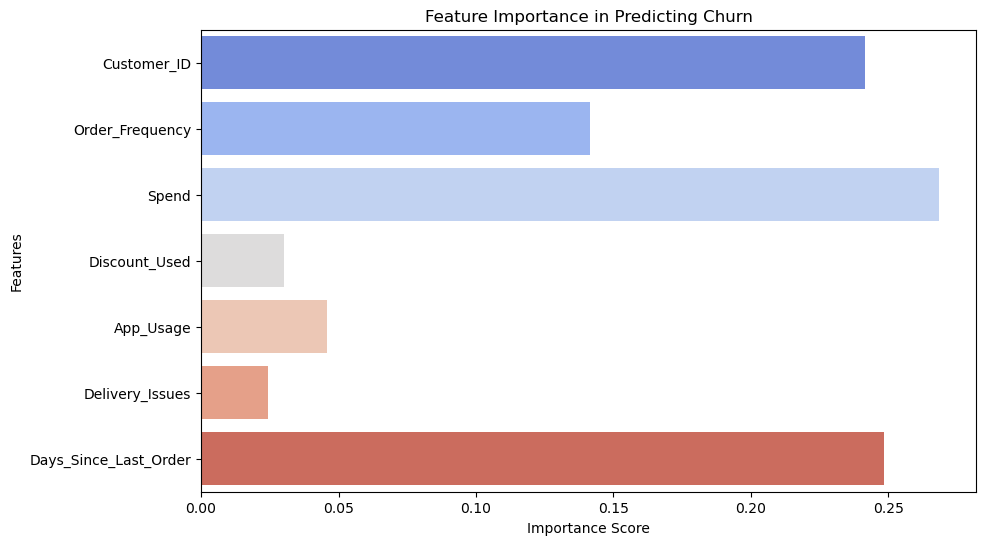

In [19]:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names, palette="coolwarm")
plt.title("Feature Importance in Predicting Churn")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


In [20]:
import joblib

# Save model
joblib.dump(rf_model, "churn_prediction_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [21]:
df.to_csv("final_churn_report.csv", index=False)
df.to_json("final_churn_report.json", orient="records")
print("Reports saved successfully!")


Reports saved successfully!
